<div>
    <h1><center style="background-color:#C39BD3; color:white;"> Housing Prices in Modern Metropolitan India</center></h1>
<font size='4'>
    PSC Innovative Project : 21BCE085 , HENIL SHALIN PANCHAL <br>
    Batch B1, CSE B Division</font>
</div>

In [ ]:
!pip install eli5 xgboost

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math
import eli5

from eli5.sklearn import PermutationImportance

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error,r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import tree

In [ ]:
!unzip dataset.zip

Archive:  dataset.zip
   creating: dataset/
  inflating: dataset/Bangalore.csv   
  inflating: dataset/Chennai.csv     
  inflating: dataset/Delhi.csv       
  inflating: dataset/Hyderabad.csv   
  inflating: dataset/Kolkata.csv     
  inflating: dataset/Mumbai.csv      


In [ ]:
df1 = pd.read_csv('dataset/Mumbai.csv')
df2 = pd.read_csv('dataset/Delhi.csv')
df3 = pd.read_csv('dataset/Chennai.csv')
df4 = pd.read_csv('dataset/Hyderabad.csv')
df5 = pd.read_csv('dataset/Bangalore.csv')
df6 = pd.read_csv('dataset/Kolkata.csv')

In [ ]:
df1.head(5)

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,4850000,720,Kharghar,1,1,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
1,4500000,600,Kharghar,1,1,1,1,1,0,1,...,1,0,1,0,0,0,0,0,0,0
2,6700000,650,Kharghar,1,1,1,1,1,0,1,...,1,0,1,0,0,0,0,0,0,0
3,4500000,650,Kharghar,1,1,1,0,0,1,0,...,1,1,1,0,0,0,0,0,1,0
4,5000000,665,Kharghar,1,1,1,0,0,1,0,...,1,0,1,0,0,0,0,0,0,0


In [ ]:
df2.head(5)

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,10500000,1200,Sector 10 Dwarka,2,1,0,1,0,0,1,...,1,0,1,0,0,0,0,0,0,0
1,6000000,1000,Uttam Nagar,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15000000,1350,Sarita Vihar,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2500000,435,Uttam Nagar,2,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,5800000,900,Dwarka Mor,3,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
df3.head(5)

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,5500000,1310,Perungalathur,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5350000,1126,Madhavaram,2,0,0,1,1,1,0,...,1,0,0,0,0,0,0,0,0,0
2,8205000,1307,Karapakkam,3,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,23400000,3600,Thiruvidandhai,3,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,10100000,1700,Iyappanthangal,3,0,0,1,1,1,1,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
df4.head(5)

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,6968000,1340,Nizampet,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
1,29000000,3498,Hitech City,4,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,6590000,1318,Manikonda,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5739000,1295,Alwal,3,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,5679000,1145,Kukatpally,2,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
df5.head(5)

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,30000000,3340,JP Nagar Phase 1,4,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
1,7888000,1045,Dasarahalli on Tumkur Road,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,4866000,1179,Kannur on Thanisandra Main Road,2,0,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
3,8358000,1675,Doddanekundi,3,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,6845000,1670,Kengeri,3,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
df6.head(5)

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,2235000,1016,Barasat,3,0,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
1,3665999,1111,Keshtopur,2,0,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,3774000,1020,Rajarhat,2,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,2524000,935,Narendrapur,2,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,8300000,1956,New Town,3,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0


In [ ]:
df1.replace(9, np.nan, inplace=True)
df2.replace(9, np.nan, inplace=True)
df3.replace(9, np.nan, inplace=True)
df4.replace(9, np.nan, inplace=True)
df5.replace(9, np.nan, inplace=True)
df6.replace(9, np.nan, inplace=True)

In [ ]:
df1 = df1.dropna()
df2 = df2.dropna()
df3 = df3.dropna()
df4 = df4.dropna()
df5 = df5.dropna()
df6 = df6.dropna()

In [ ]:
print(f"Mumbai:{df1.shape}")
print(f"Delhi:{df2.shape}")
print(f"Chennai:{df3.shape}")
print(f"Hyderabad:{df4.shape}")
print(f"Bangalore:{df5.shape}")
print(f"Kolkata:{df6.shape}")

Mumbai:(7719, 40)
Delhi:(4998, 40)
Chennai:(5014, 40)
Hyderabad:(2518, 40)
Bangalore:(6207, 40)
Kolkata:(6507, 40)


In [ ]:
print(f"Data types of columns: \n{df1.dtypes}")

Data types of data columns: 
Price                    int64
Area                     int64
Location                object
No. of Bedrooms          int64
Resale                   int64
MaintenanceStaff       float64
Gymnasium              float64
SwimmingPool           float64
LandscapedGardens      float64
JoggingTrack           float64
RainWaterHarvesting    float64
IndoorGames            float64
ShoppingMall           float64
Intercom               float64
SportsFacility         float64
ATM                    float64
ClubHouse              float64
School                 float64
24X7Security           float64
PowerBackup            float64
CarParking             float64
StaffQuarter           float64
Cafeteria              float64
MultipurposeRoom       float64
Hospital               float64
WashingMachine         float64
Gasconnection          float64
AC                     float64
Wifi                   float64
Children'splayarea     float64
LiftAvailable          float64
BED       

In [ ]:
# scale price to INR Lakhs
df1['Price'] = df1['Price']/100000
df2['Price'] = df2['Price']/100000
df3['Price'] = df3['Price']/100000
df4['Price'] = df4['Price']/100000
df5['Price'] = df5['Price']/100000
df6['Price'] = df6['Price']/100000

In [ ]:
def triple_plot(x, title):
    fig, ax = plt.subplots(3,1,figsize=(20,10))
    sns.distplot(x, ax=ax[0])
    ax[0].set(xlabel=None)
    ax[0].set_title('Histogram + KDE')
    sns.boxplot(x, ax=ax[1])
    ax[1].set(xlabel=None)
    ax[1].set_title('Boxplot')
    sns.violinplot(x, ax=ax[2])
    ax[2].set(xlabel=None)
    ax[2].set_title('Violin plot')
    fig.suptitle(title, fontsize=16)
    plt.tight_layout(pad=3.0)
    plt.show()

<ipython-input-35-3ac6eb34a6b2>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, ax=ax[0])


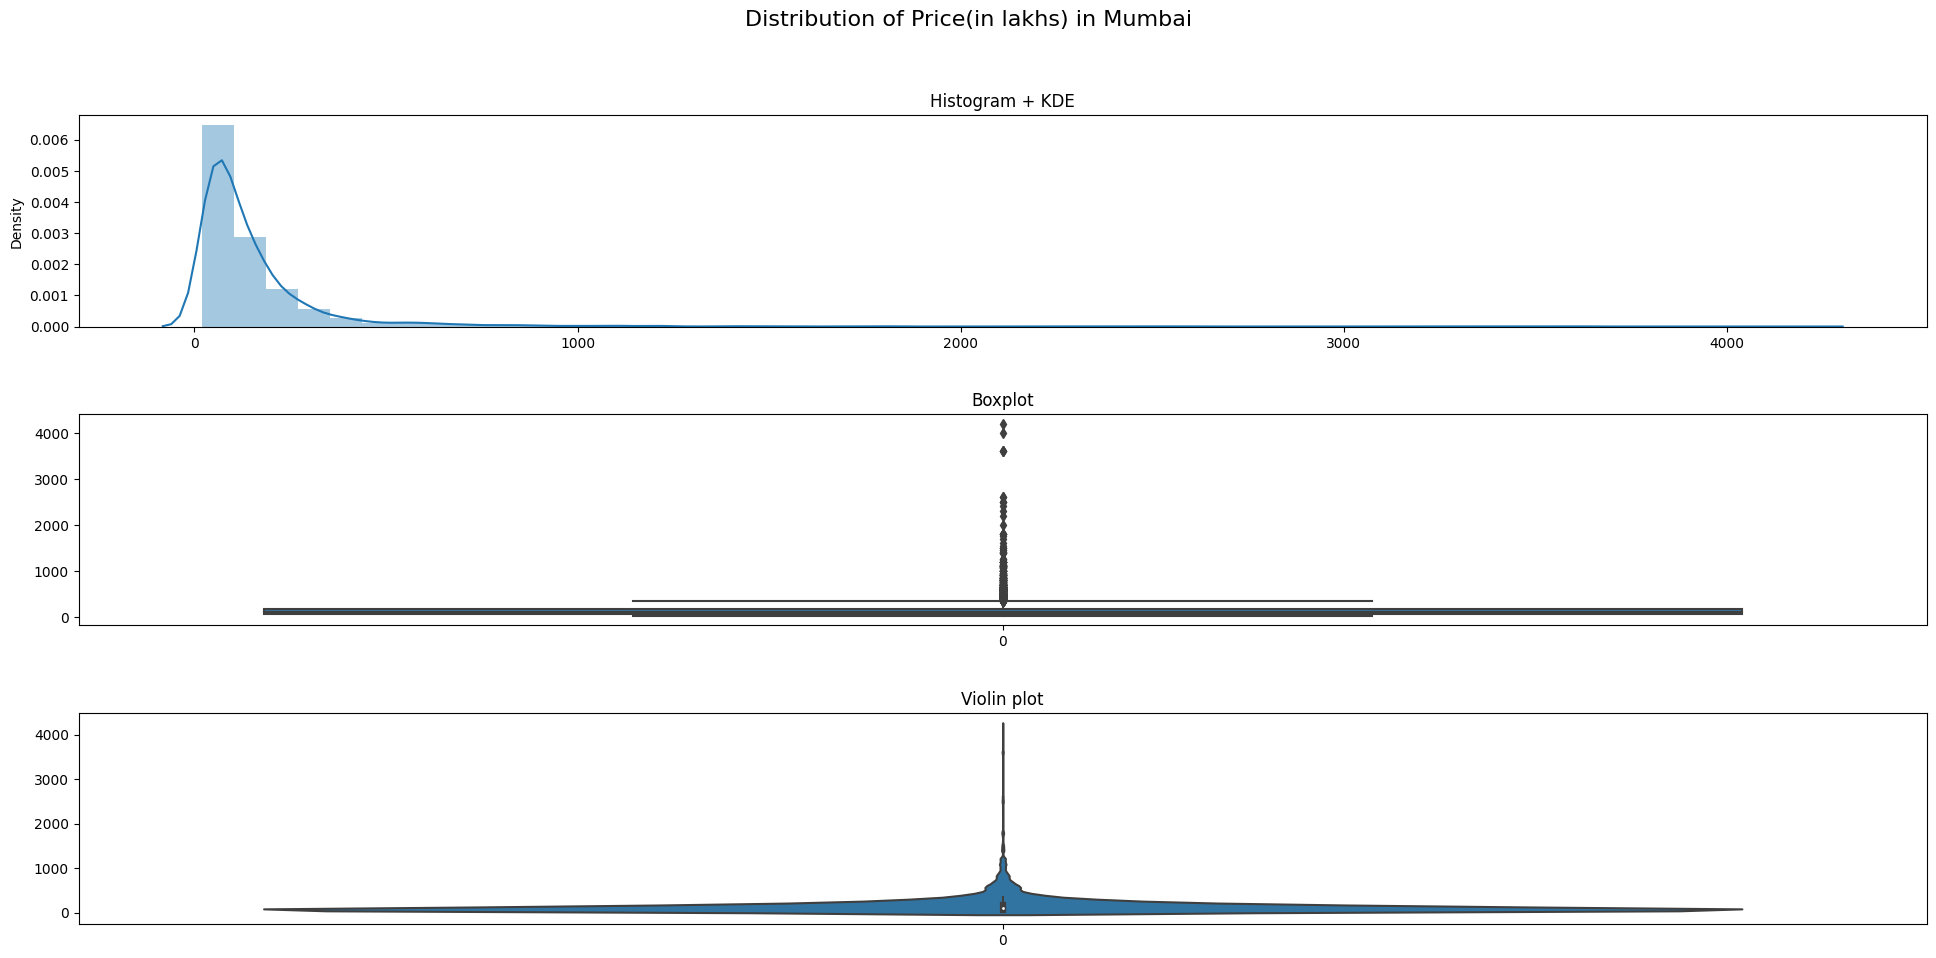

In [ ]:
triple_plot(df1['Price'],'Distribution of Price(in lakhs) in Mumbai')

<ipython-input-35-3ac6eb34a6b2>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, ax=ax[0])


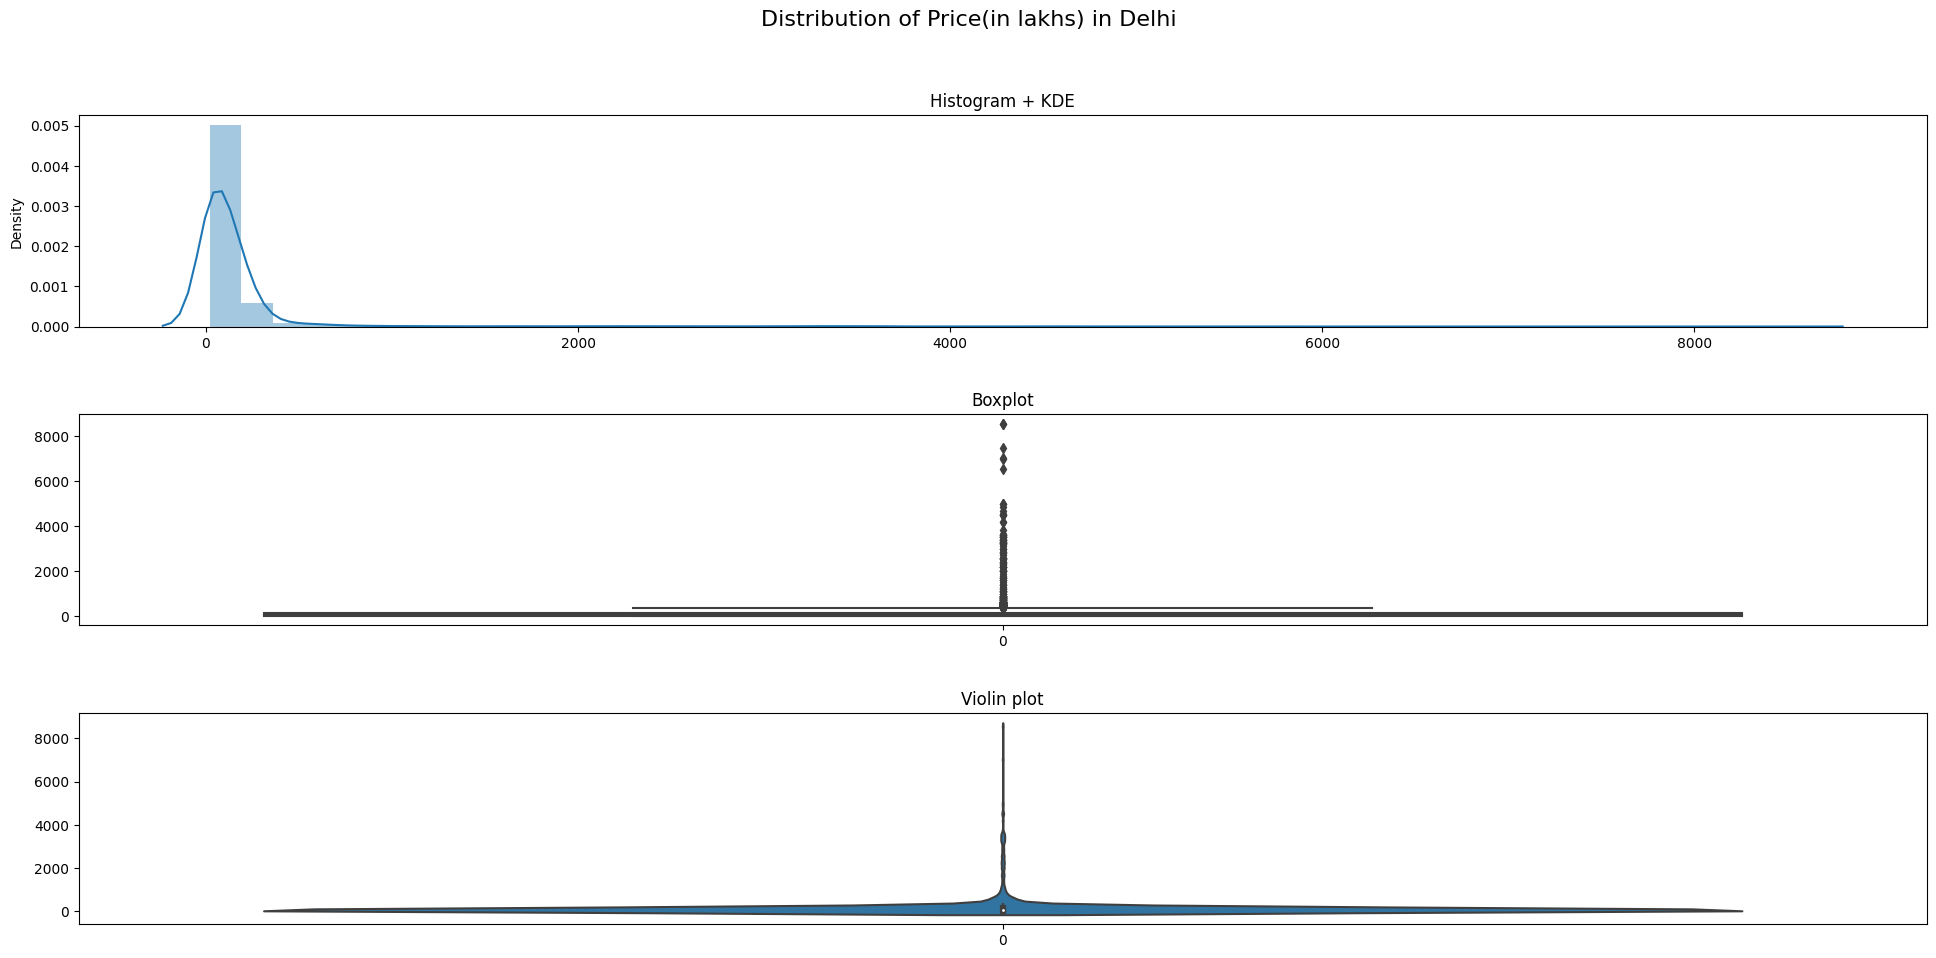

In [ ]:
triple_plot(df2['Price'],'Distribution of Price(in lakhs) in Delhi')

<ipython-input-35-3ac6eb34a6b2>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, ax=ax[0])


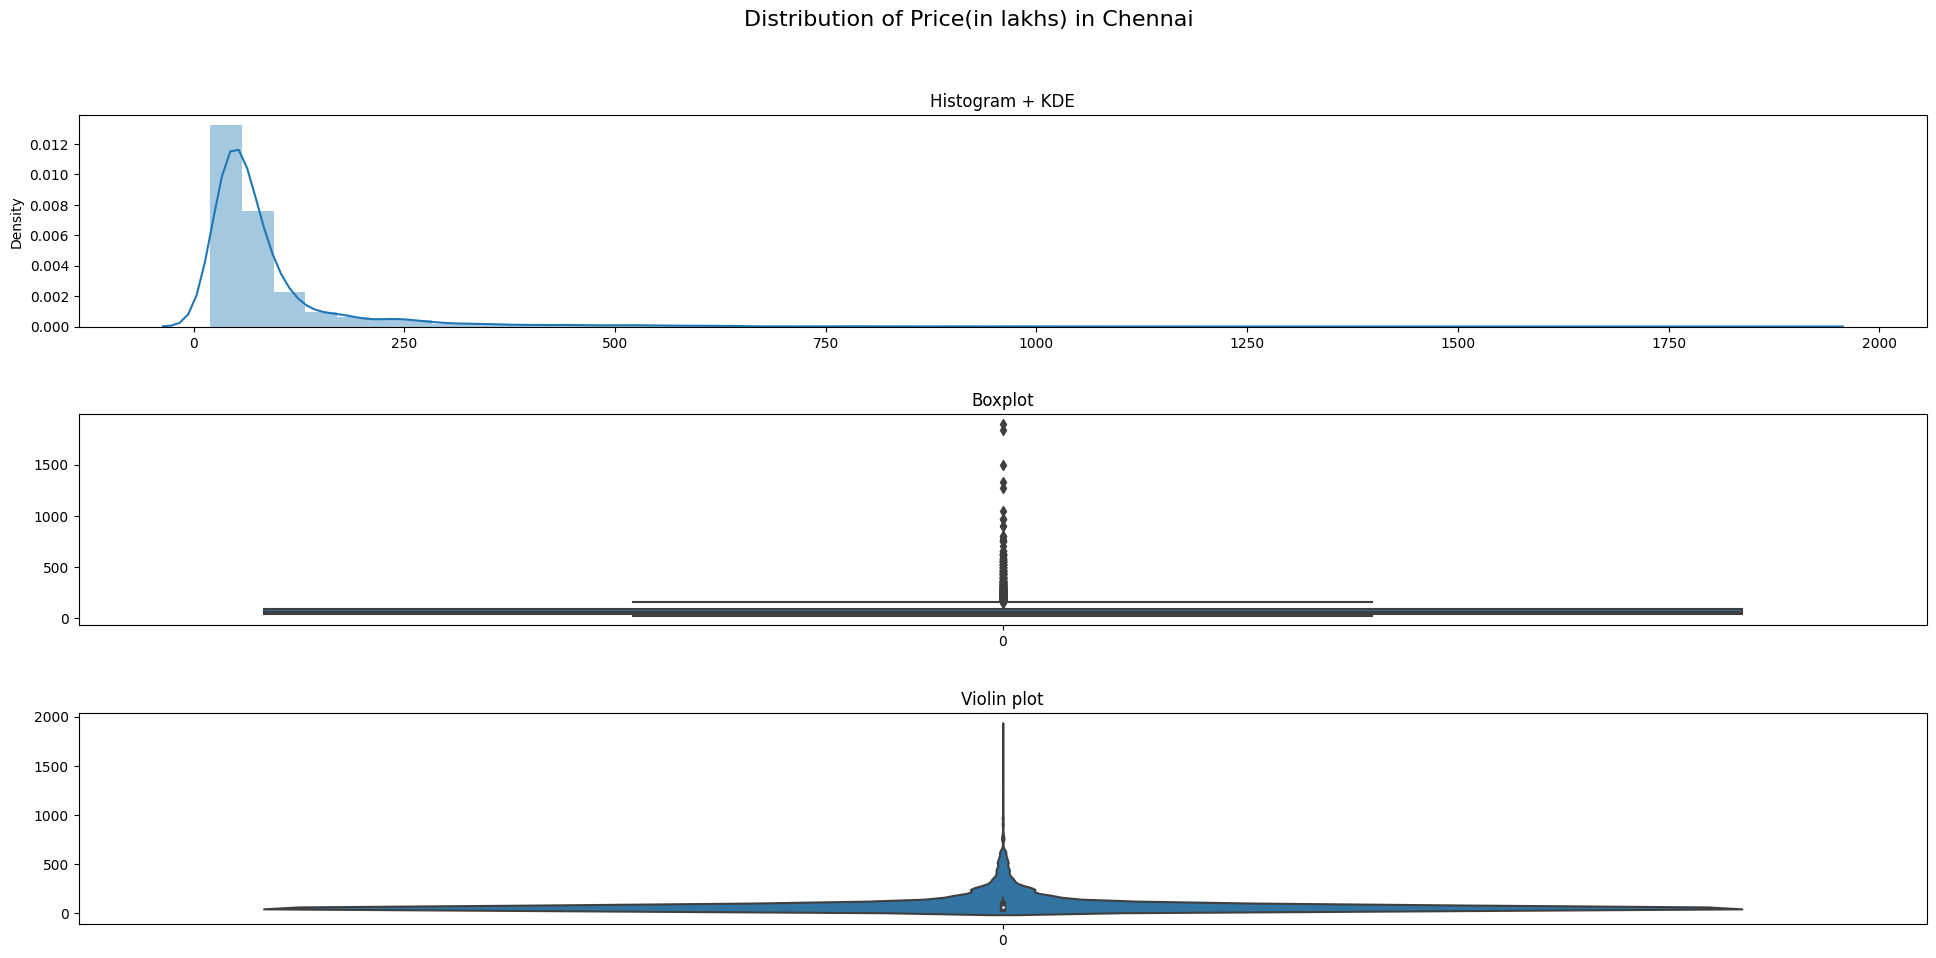

In [ ]:
triple_plot(df3['Price'],'Distribution of Price(in lakhs) in Chennai')

<ipython-input-35-3ac6eb34a6b2>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, ax=ax[0])


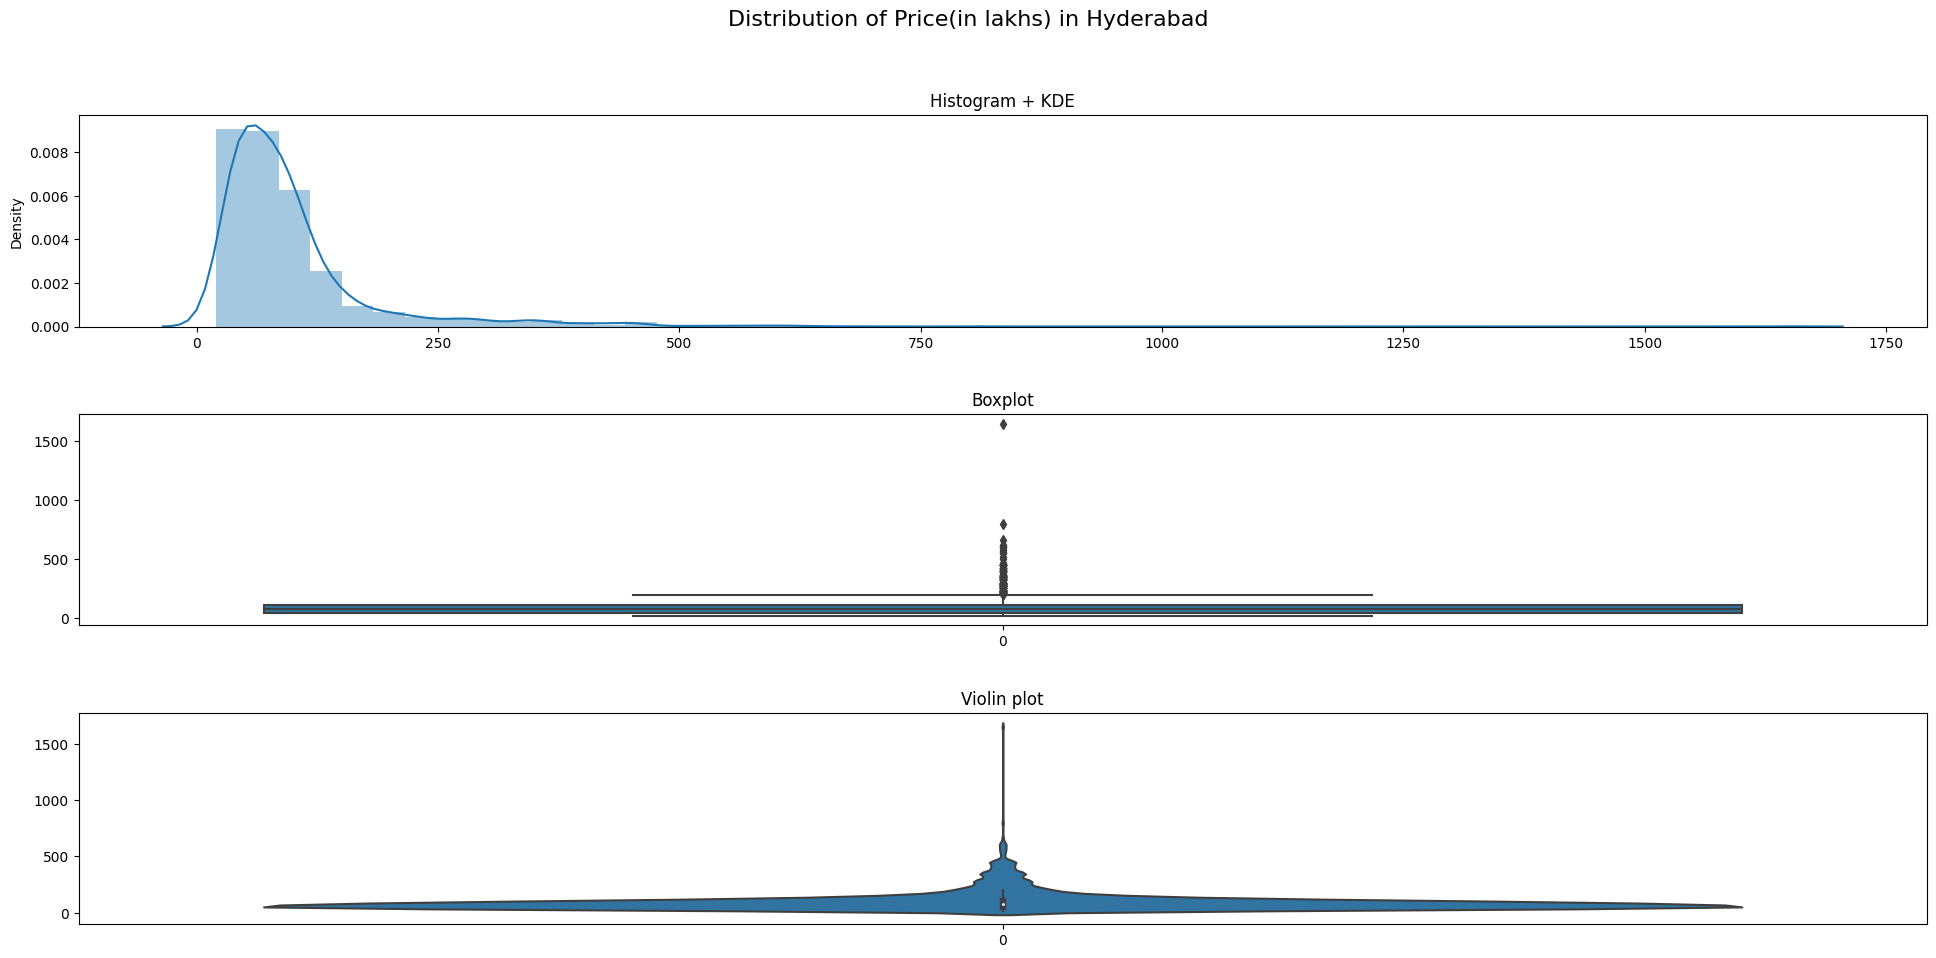

In [ ]:
triple_plot(df4['Price'],'Distribution of Price(in lakhs) in Hyderabad')

<ipython-input-35-3ac6eb34a6b2>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, ax=ax[0])


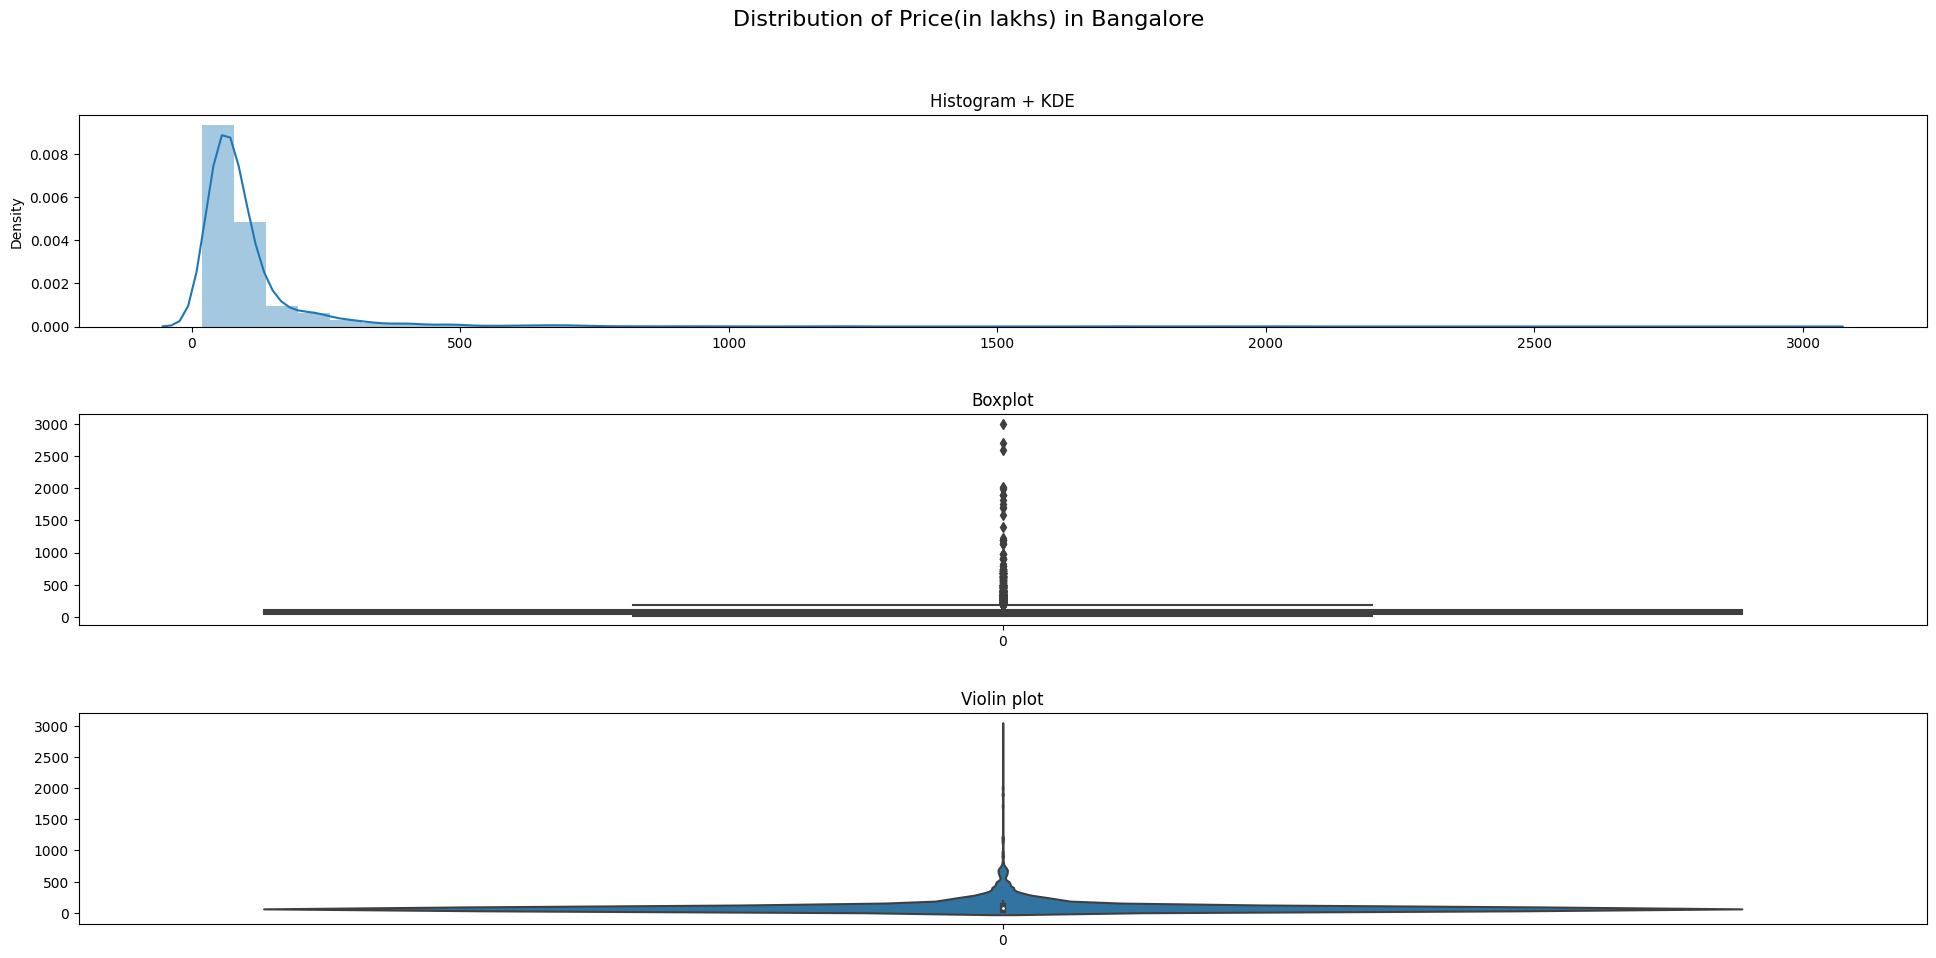

In [ ]:
triple_plot(df5['Price'],'Distribution of Price(in lakhs) in Bangalore')

<ipython-input-35-3ac6eb34a6b2>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, ax=ax[0])


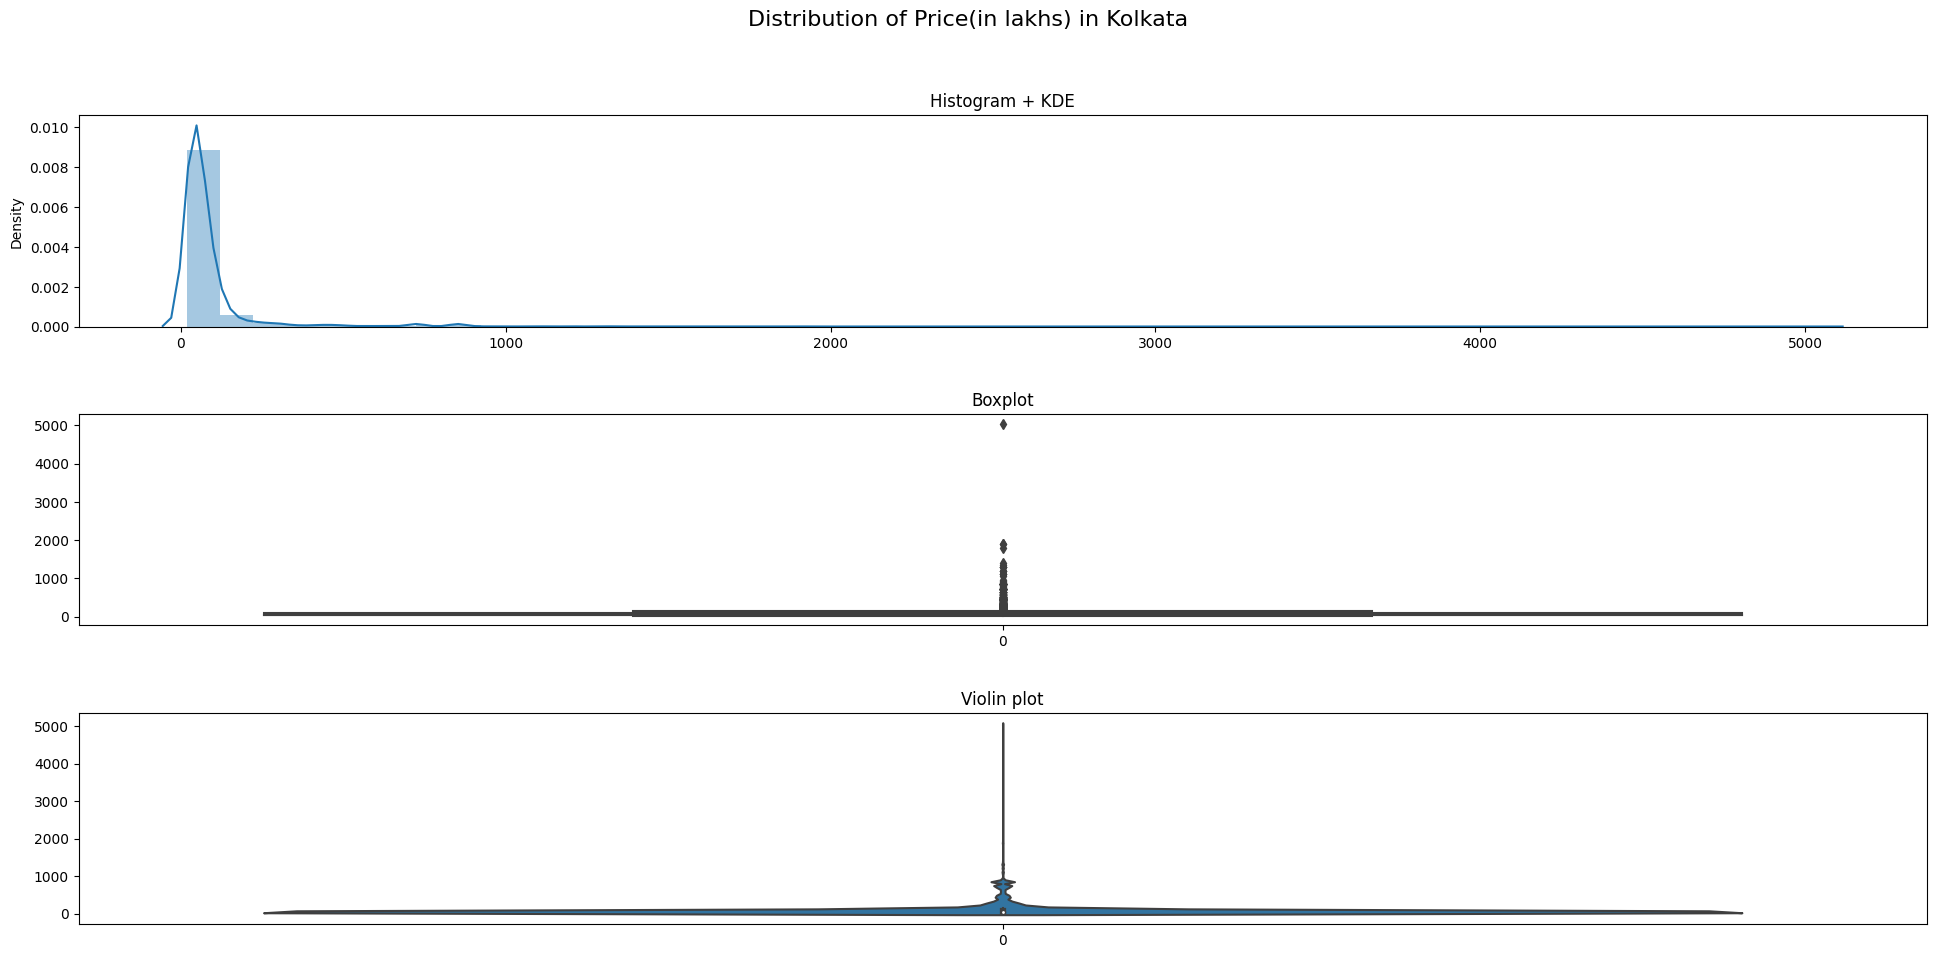

In [ ]:
triple_plot(df6['Price'],'Distribution of Price(in lakhs) in Kolkata')

In [ ]:
def scatter_plot(data,title):
    sns.scatterplot(x="Area", y="Price", data=data,marker="P")
    plt.title('Area in square feet vs Price in '+ title,size=16)
    plt.gcf().set_size_inches(6,8)
    plt.show()

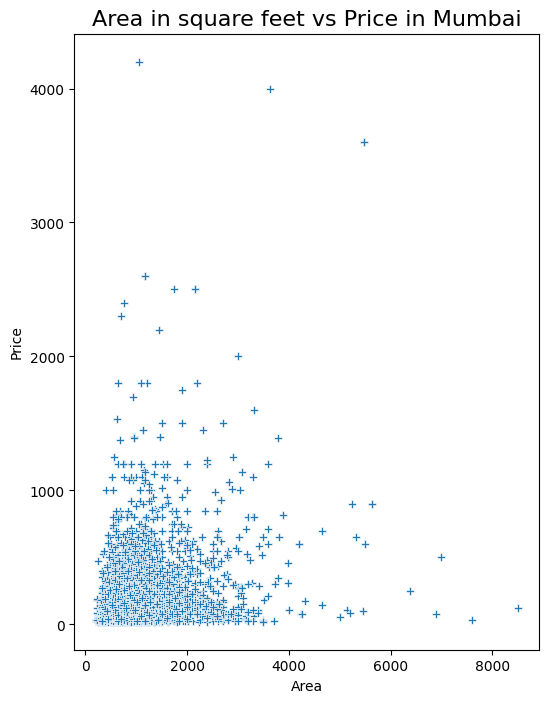

In [ ]:
scatter_plot(df1,'Mumbai')

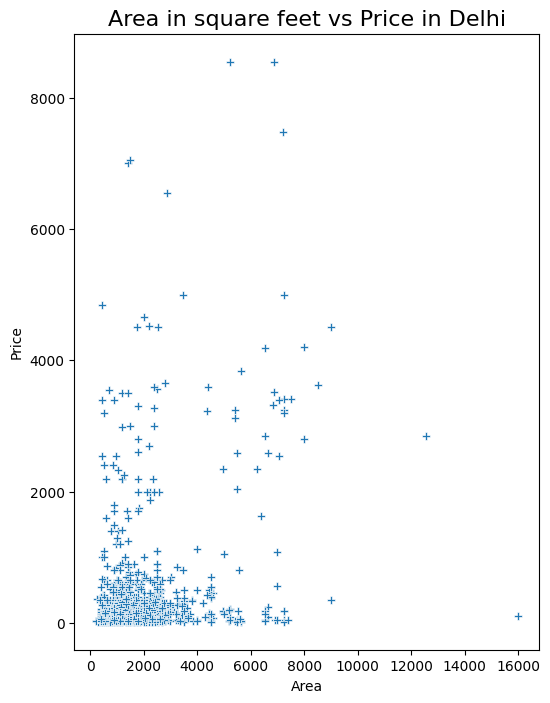

In [ ]:
scatter_plot(df2,'Delhi')

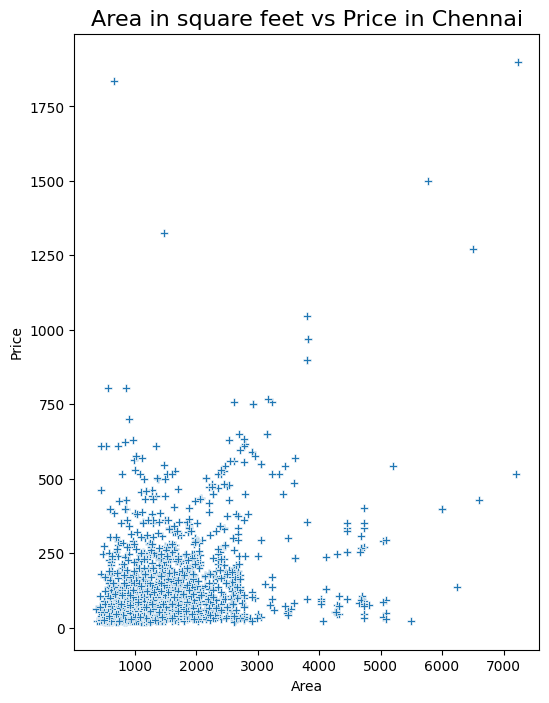

In [ ]:
scatter_plot(df3,'Chennai')

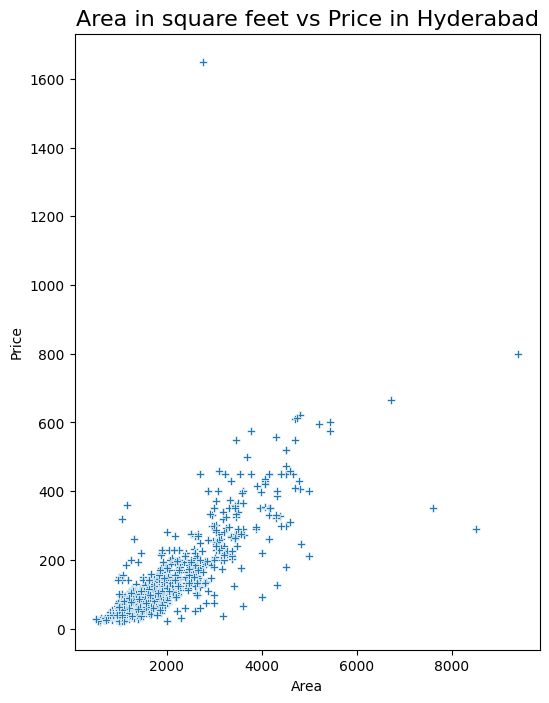

In [ ]:
scatter_plot(df4,'Hyderabad')

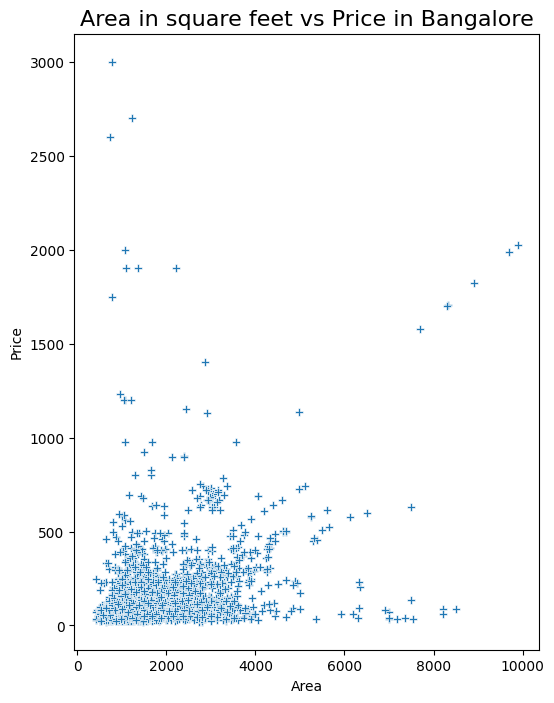

In [ ]:
scatter_plot(df5,'Bangalore')

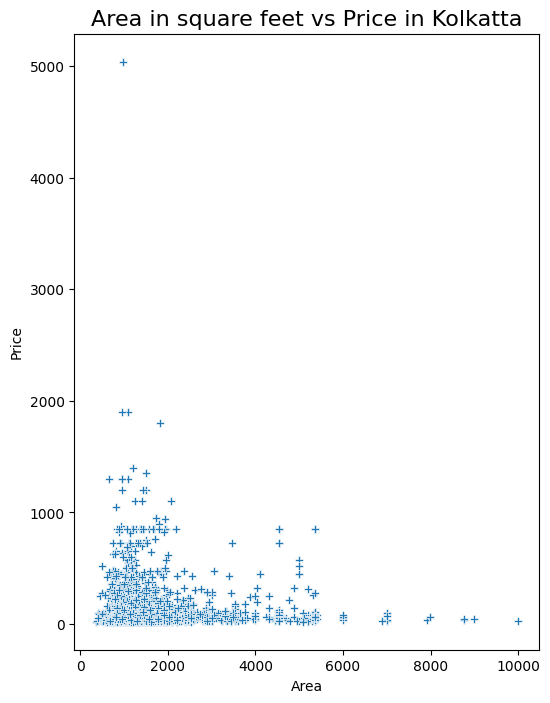

In [ ]:
scatter_plot(df6,'Kolkatta')

In [ ]:
frames = [df1,df2,df3,df4,df5,df6]
merged = pd.concat(frames)
merged = merged.loc[:, ~merged.columns.str.contains('^Unnamed')]

In [ ]:
merged.columns
merged = merged.rename(columns={"Children'splayarea": "Playground"})
merged = merged.dropna()

In [ ]:
merged.corr()

<ipython-input-52-c6ad84058222>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  merged.corr()


,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
Price,1.000000,0.295062,0.163689,0.057410,0.039533,0.041247,0.041525,0.040677,0.040188,0.040948,...,0.039589,0.039500,0.039279,0.039016,0.038514,0.039125,0.038966,0.039052,0.038882,0.039134
Area,0.295062,1.000000,0.706007,-0.057304,-0.048674,-0.038306,-0.037183,-0.040399,-0.039786,-0.041423,...,-0.044236,-0.047606,-0.043396,-0.046494,-0.047808,-0.046955,-0.046786,-0.046696,-0.047988,-0.046777
No. of Bedrooms,0.163689,0.706007,1.000000,-0.081430,-0.041628,-0.034151,-0.032588,-0.034879,-0.034571,-0.036622,...,-0.035475,-0.039420,-0.036385,-0.037706,-0.038932,-0.037976,-0.037857,-0.037964,-0.038994,-0.037885
Resale,0.057410,-0.057304,-0.081430,1.000000,0.060388,0.047160,0.044637,0.048145,0.046946,0.052463,...,0.053522,0.057033,0.053369,0.052851,0.052646,0.053394,0.052925,0.053503,0.054885,0.052993
MaintenanceStaff,0.039533,-0.048674,-0.041628,0.060388,1.000000,0.996703,0.996574,0.997164,0.997125,0.997564,...,0.996997,0.998400,0.997422,0.998261,0.998651,0.998261,0.998213,0.998244,0.998626,0.998233
Gymnasium,0.041247,-0.038306,-0.034151,0.047160,0.996703,1.000000,0.998830,0.998032,0.998295,0.997547,...,0.997088,0.997103,0.997156,0.997313,0.997511,0.997188,0.997315,0.997362,0.997290,0.997291
SwimmingPool,0.041525,-0.037183,-0.032588,0.044637,0.996574,0.998830,1.000000,0.998323,0.998604,0.997828,...,0.996931,0.996909,0.997494,0.997504,0.997671,0.997355,0.997502,0.997523,0.997442,0.997480
LandscapedGardens,0.040677,-0.040399,-0.034879,0.048145,0.997164,0.998032,0.998323,1.000000,0.998626,0.998166,...,0.996891,0.997102,0.997687,0.997552,0.997864,0.997429,0.997545,0.997591,0.997672,0.997545
JoggingTrack,0.040188,-0.039786,-0.034571,0.046946,0.997125,0.998295,0.998604,0.998626,1.000000,0.998315,...,0.996812,0.997035,0.998100,0.997593,0.997932,0.997475,0.997556,0.997576,0.997661,0.997573
RainWaterHarvesting,0.040948,-0.041423,-0.036622,0.052463,0.997564,0.997547,0.997828,0.998166,0.998315,1.000000,...,0.996884,0.996962,0.998125,0.997408,0.997765,0.997392,0.997384,0.997416,0.997656,0.997405


In [ ]:
del merged['Location']

In [ ]:
feature_names = merged.columns

X = merged[feature_names]
del X['Price']
feature_names = X.columns
y = merged['Price']

In [ ]:
X.columns

Index(['Area', 'No. of Bedrooms', 'Resale', 'MaintenanceStaff', 'Gymnasium',
       'SwimmingPool', 'LandscapedGardens', 'JoggingTrack',
       'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall', 'Intercom',
       'SportsFacility', 'ATM', 'ClubHouse', 'School', '24X7Security',
       'PowerBackup', 'CarParking', 'StaffQuarter', 'Cafeteria',
       'MultipurposeRoom', 'Hospital', 'WashingMachine', 'Gasconnection', 'AC',
       'Wifi', 'Playground', 'LiftAvailable', 'BED', 'VaastuCompliant',
       'Microwave', 'GolfCourse', 'TV', 'DiningTable', 'Sofa', 'Wardrobe',
       'Refrigerator'],
      dtype='object')

In [ ]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=85,test_size=0.2)
model = RandomForestRegressor().fit(train_X, train_y)

In [ ]:
perm = PermutationImportance(model, random_state=85).fit(val_X, val_y)
eli5.show_weights(perm, feature_names = val_X.columns.tolist())

Weight,Feature
0.3579 ± 0.0439,Area
0.0319 ± 0.0333,No. of Bedrooms
0.0201 ± 0.0063,Wardrobe
0.0134 ± 0.0071,AC
0.0097 ± 0.0085,Playground
0.0063 ± 0.0468,Resale
0.0059 ± 0.0006,SwimmingPool
0.0053 ± 0.0026,Refrigerator
0.0050 ± 0.0047,TV
0.0037 ± 0.0090,Gasconnection


In [ ]:
model2 = DecisionTreeRegressor(random_state=0, max_depth=6, min_samples_split=5).fit(train_X, train_y)

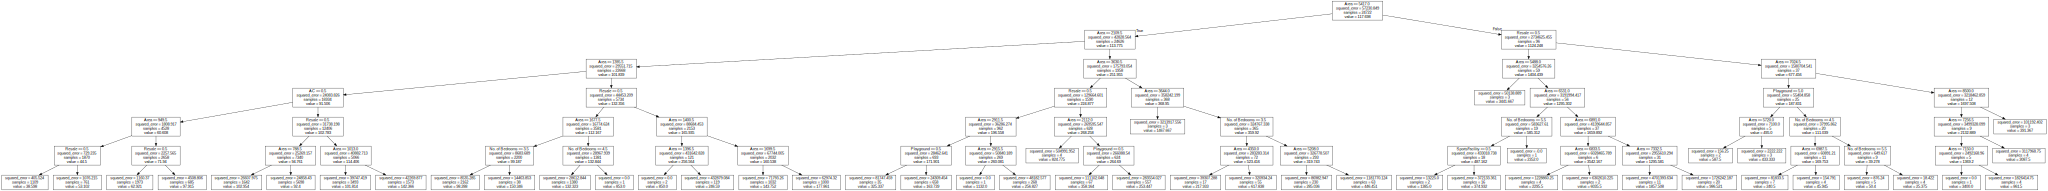

In [ ]:
tree_graph = tree.export_graphviz(model2, out_file=None, feature_names=feature_names)
graphviz.Source(tree_graph)

# Model Training 

In [ ]:
feature_names = ["Area","No. of Bedrooms","Wardrobe","AC","Playground"]

In [ ]:
feature_names = ["Area","No. of Bedrooms","Wardrobe","AC","Playground"]

X = merged[feature_names]
y = merged['Price']

scale_max = y.max()
scale_min = y.min() 

y = (y - scale_min)/(scale_max-scale_min)   # scaling the training vals

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

In [ ]:
l = []
def train_model(m):
    model = m
    model.fit(X=train_X, y=train_y)
    predictions = model.predict(val_X)
    mae = mean_absolute_error(val_y, predictions)
    rmse = mean_squared_error(val_y, predictions,squared=False)
    mse = mean_squared_error(val_y, predictions)
    r2 = r2_score(val_y, predictions)
    l.append([mae,mse,rmse,r2])
    return model
    # print("{0} mae {1} r2 {2}".format(name,mae,r2))


dt = train_model(DecisionTreeRegressor())
rf = train_model(RandomForestRegressor())   
xg = train_model(XGBRegressor(n_estimators=600))   
results = pd.DataFrame(l,columns=["MAPE","RMSE","MSE","R2"],index=['Decision Tree Regressor',"Random Forest Regressor","XGBoost Regressor"])

In [ ]:
results

,MAE,RMSE,MSE,R2
Decision Tree Regressor,0.009854,0.000910,0.030171,-0.262461
Random Forest Regressor,0.009568,0.000773,0.027810,-0.072595
XGBoost Regressor,0.009475,0.000810,0.028454,-0.122868


# Housing Price Prediction

In [ ]:
def pred(m,name):
  model = m
  pred_df = pd.DataFrame([a],columns =feature_names)
  pred = model.predict(pred_df)
  scaled_pred = pred*(scale_max-scale_min)+scale_min
  print(f"Predicted Price by {name}: {scaled_pred[0]} lakhs")


In [ ]:
print("Enter the following details to predict the price of hous in modern metropolitan india:")
a =[]
for i in feature_names:
  a.append(int(input(f"{i}:")))

pred(rf,"Random Forest")
# pred(xg,"Xgboost")
# pred(dt,"Decision Tree")

Enter the following details to predict the price of hous in modern metropolitan india:
Area:1000
No. of Bedrooms:2
Wardrobe:0
AC:0
Playground:0
Predicted Price by Random Forest: 62.10506974651737 lakhs
